In [4]:
!pip install parsel

In [32]:
import urllib.request
#import parsel
from html.parser import HTMLParser
from urllib.parse import urlparse
from parsel import Selector
from matplotlib import pyplot as plt
import networkx as nx

In [8]:
with urllib.request.urlopen('https://www.indiatoday.in/') as response:
    html = response.read()

In [9]:
selector = Selector(text=html.decode("utf-8",errors='ignore') )
pol = selector.css('body').get()

In [10]:
class MyHTMLParser(HTMLParser):
    def handle_data(self, data):
        if data.strip()!="":
            pass

In [11]:
parser = MyHTMLParser()

In [12]:
parser.feed(pol.replace("\\n",""))

In [13]:
type(parser)

__main__.MyHTMLParser

In [14]:
def getDataFromUrl(url):
    with urllib.request.urlopen(url) as response:
        html = response.read()
    return html

In [15]:
def getSelector(html):
    selector = Selector(text=html.decode("utf-8",errors='ignore'))
    return selector

In [16]:
def getBody(selector):
    pol = selector.css('body').get()
    return pol

In [17]:
def getUrls(selector):
    urls = selector.xpath('//a/@href').getall()
    return urls

In [18]:
def processQueueElement(url):
    parsedUrl = urlparse(url)
    data = getDataFromUrl(url)
    selector = getSelector(data)
    body = getBody(selector)
    urls = getUrls(selector)
    for idx,i in enumerate(urls):
        if i.startswith("/"):
            urls[idx] = parsedUrl.scheme+'://'+parsedUrl.netloc+i
            #print(urls[idx])
    return urls

In [19]:
result={'source':[],'dest':[]} 
class graphLinkInfo :
    def storeGraphlink(graph):
        edges = nx.to_edgelist(graph)
        for edge in edges:
            result['source'].append(edge[0])
            result['dest'].append(edge[1])
        

In [20]:
seedurls=['https://www.indiatoday.in/','https://www.geeksforgeeks.org/',
         'https://www.imdb.com/','https://www.amazon.in/','https://gadgets.ndtv.com/']

for link in seedurls:
    try:
        urllib.request.urlopen(link)
        urls = processQueueElement(link)
        graph = nx.DiGraph()

        for i in urls:
            if not i.startswith("#"):
                graph.add_edge(link,i)
        
        # use the graph to store source -> target link information for each of the 'links'
        graphLinkInfo.storeGraphlink(graph)
    except urllib.error.HTTPError as err:
        print("Hello")
        pass
    
print(result)

Hello
{'source': ['https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoda

In [21]:
print(type(seedurls))
print(seedurls)
    

<class 'list'>
['https://www.indiatoday.in/', 'https://www.geeksforgeeks.org/', 'https://www.imdb.com/', 'https://www.amazon.in/', 'https://gadgets.ndtv.com/']


In [22]:
#for i in seedurls:
backqueue1=[]
backqueue2=[]
backqueue3=[]
backqueue4=[]
backqueue5=[]

src = result['source']
dst = result['dest']

for i in range(0,len(src)):
    if src[i] == 'https://www.indiatoday.in/' :
        backqueue1.append(dst[i])
    if src[i] == 'https://www.geeksforgeeks.org/' :
        backqueue2.append(dst[i])
    if src[i] == 'https://www.imdb.com/' :
        backqueue3.append(dst[i])
    if src[i] == 'https://www.amazon.in/' :
        backqueue4.append(dst[i])
    if src[i] == 'https://gadgets.ndtv.com/' :
        backqueue5.append(dst[i])

print(len(result['dest']))
print(len(backqueue1)+len(backqueue2)+len(backqueue3)+len(backqueue4)+len(backqueue5))

763
763


In [23]:
from queue import PriorityQueue
from urllib.parse import urlparse
minheap=PriorityQueue()
dupcheck = set()
import time
minheap.put(time.time(),seedurls[0])
minheap.put(time.time(),seedurls[1])
minheap.put(time.time(),seedurls[2])
minheap.put(time.time(),seedurls[3])
minheap.put(time.time(),seedurls[4])

In [24]:
# url='https://www.indiatoday.in/'
# o=urlparse('https://www.indiatoday.in/trending-news')
# print(o.netloc)
# print(type(o.netloc))

# get netloc / domain of the seed urls:
def checkDomain(src,urlBackqueue):
    s=urlparse(src)
    b=urlparse(urlBackqueue)
    if s == b:
        return True
    else :
        return False

In [25]:
dictHostnameToQueue={seedurls[0]:'https://www.indiatoday.in/',seedurls[1]:'https://www.geeksforgeeks.org/',
                     seedurls[2]:'https://www.imdb.com/',seedurls[3]:'https://www.amazon.in',
                     seedurls[4]:'https://gadgets.ndtv.com/'
                     }

In [26]:
class mercator_crawler:
    def __init__(self,source,backqueue):
        #self.resultdict = resultdict
        self.source=source
        self.minheap = PriorityQueue()
        self.backqueue=backqueue
        self.mostrecenttime=time.time()
        
        
    def crawlwebpage(self):
        for i in self.backqueue :
            try:
                if(checkDomain(self.source,i)):
                    urllib.request.urlopen(i)
                    if i in dupcheck :
                        continue
                    links=processQueueElement(i)
                    for j in links:
                        if not(j.startswith("#")) and (checkDomain(self.source,j)):
                            self.backqueue.append(j)
                            dupcheck.add(j)
            except (urllib.error.URLError, urllib.error.HTTPError, urllib.error.ContentTooShortError) as e:
                print('Download error:', e.reason)
                continue


In [27]:
# crawl=mercator_crawler(result)
# crawl.crawlwebpage()

In [28]:
graph = nx.DiGraph()
allURLs =[]
try:
    for link in seedurls:
        urls =processQueueElement(link)
        for i in urls:
            if not i.startswith("#"):
                graph.add_edge(link,i)
        for i in range(0,25):
            try:
                urlsx = processQueueElement(urls[i])
            except:
                urlsx = []
        for j in urlsx:
            if not j.startswith("#"):
                graph.add_edge(urls[i],j)
        allURLs.extend(urls)
except urllib.error.HTTPError as err:
        print("Hello")
        pass

Hello


In [29]:
print(len(graph.nodes()))
print(len(allURLs))

1153
1044


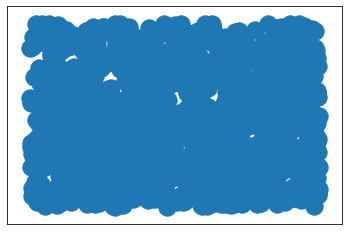

In [30]:
nx.draw_networkx_nodes(graph,pos=nx.random_layout(graph))

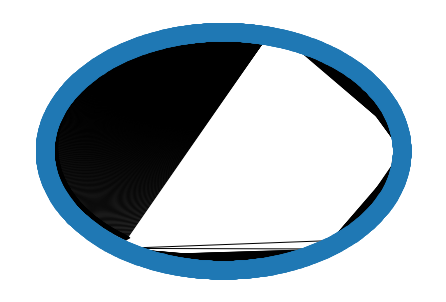

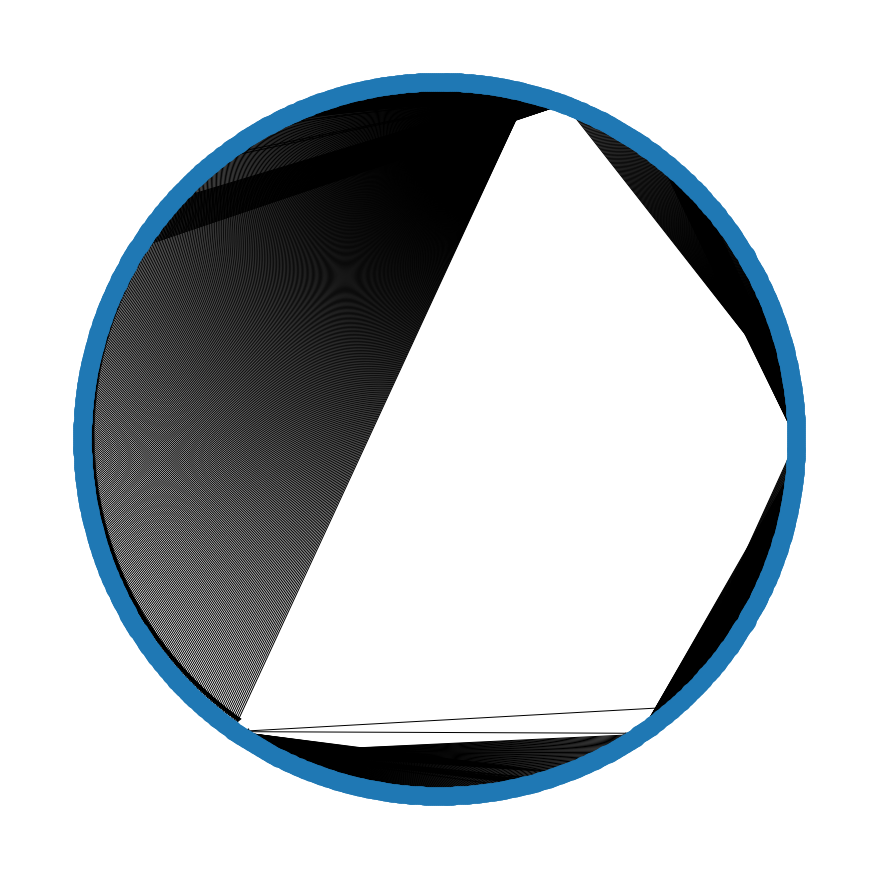

In [44]:
G=graph
pos = nx.circular_layout(G)
# default
plt.figure(1)
nx.draw(G,pos)

plt.figure(3,figsize=(12,12)) 
nx.draw(G,pos)
plt.show()

In [35]:
graph.in_edges(urls[1])
def calculatePageRank(node,visited):

    visited.add(node)
    indeg = graph.in_degree(node)
    try:
        if(indeg >= 1):
            indeg=indeg
    except TypeError:
        indeg=0    
    return indeg
#graph.out_degree(urls[1])
#calculatePageRank(urls[89],{-1})
# type(graph.in_edges(urls[0]))

In [36]:
len(urls)

190

In [60]:
outNodes=[]
count=0
for node in graph.nodes():
    outdeg=graph.out_degree(node)
    try:
        if(outdeg>=1):
            outNodes.append(node)
        else:
            count=count+1
    except TypeError:
            outdeg=0
            count=count+1
print(count)

1145


In [110]:
print((outNodes))
print (count)

['https://www.indiatoday.in/', 'https://www.indiatoday.in/programmes', 'https://www.geeksforgeeks.org/', 'http://www.geeksforgeeks.org/data-structures/', 'https://www.imdb.com/', 'https://www.imdb.com/streaming/', 'https://www.amazon.in/', 'https://www.amazon.in/Low-Price-With-Free-Shipping/bbp?category=/womens&pf_rd_p=7ae8bb23-c2d2-4277-a4e5-a651d0266ae5&pf_rd_r=212N0ZGWTVEF3P91BBTQ']
1145


In [38]:
rank=[]
sortedRank=[]
docId=[]

for i in range(0,len(allURLs)):
    docId.append(i)
    rank.append(calculatePageRank(allURLs[i],{-1}))
    sortedRank = [x for _,x in sorted(zip(rank,docId),reverse=True)]

In [39]:
#print(rank[140])
#print(sortedRank)

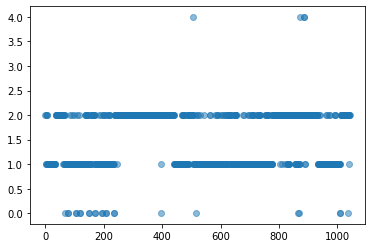

In [42]:
plt.scatter(sortedRank,rank, alpha=0.5)

In [109]:
len(graph.nodes())
    

1153

In [130]:
def CalculatePR(object):
    nodeLists=[]
    for nodes in object.nodes():
        nodeLists.append(nodes)

    pgrnk=[float(1/len(object.nodes()))]*len(object.nodes())
    for iter in range(0,3):
        for node in object.nodes():
            innodes = object.in_edges(node)
            for i in innodes:
                if not i[0]==node:
                    pgrnk[nodeLists.index(node)]+=pgrnk[nodeLists.index(i[0])]
    print(pgrnk)

In [108]:
len(pgrnk)

1153

In [132]:

subGraphOut=graph.subgraph(outNodes)

CalculatePR(graph)

[0.011274934952298352, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.01821335646140503, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.028620988725065046, 0.01821335646140503, 0.04596704249783174, 0.04596704249783174, 0.04596704249783174, 0.04596704249783174, 0.04596704249783174, 0.04596704249783174, 0.04596704249783174, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.01821335646140503, 0.0182133564

In [131]:
CalculatePR(subGraphOut)

[1.625, 0.5, 3.25, 2.625, 1.625, 0.125, 6.125, 2.625]
